# $$\textbf{TU Berlin Summer School 2025}$$

<br>

<center>
<img src='../storage/images/logo.png' width=900>
</center>

<br>

## $$\textbf{Exercise Session: NumPy Performance & Real-World ML}$$ 🚀💻

### $\textbf{Welcome to Your Advanced Python Challenge!}$ ⚡

*Today you'll optimize machine learning algorithms using NumPy and tackle real handwritten digit recognition!* ✨

In [1]:
# 📝 Enter your team information here - collaboration makes learning better!
GROUPNAME = "Group B-gogogo"  # Your team/group name
COLLABORATOR_NAMES = "Dream,marshmello, Cybertbee"  # Names of your teammates

In [2]:
# ✅ Version check - making sure you have the right Python version!
import sys
assert sys.version_info >= (3,10), 'You need to be running at least Python version 3.10'
print(f"✨ Great! You're running Python {sys.version_info.major}.{sys.version_info.minor} - you're all set!")


✨ Great! You're running Python 3.12 - you're all set!


In [3]:
# 🧪 Testing setup - This cell is for grading. DO NOT remove it!

# Use unittest asserts for automatic testing
import unittest; t = unittest.TestCase()
from pprint import pprint  # Pretty printing for better output display
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# 📊 Helper function to validate performance improvements
def assert_faster(time_old, time_new, min_speedup=1.5):
    """Ensures new implementation is significantly faster than old one"""
    speedup = time_old / time_new
    t.assertGreater(speedup, min_speedup, 
                   f'New implementation should be at least {min_speedup}x faster. Got {speedup:.2f}x')
    
print("🔧 Testing framework loaded successfully!")


🔧 Testing framework loaded successfully!


# 📋 Exercise Sheet 2: Performance Optimization & Real ML 🚀

## $\textbf{From Slow to Lightning Fast - The NumPy Revolution!}$ ⚡

### $\textbf{The Challenge We're Solving}$ 🎯

In **Exercise 1**, you built several classification methods: decision trees, nearest neighbors, and nearest means. The **k-nearest neighbors** algorithm was the most accurate because it could learn complex patterns from data. But there's a problem... 🐌

**Pure Python + Loops = SLOW!** 😰

When dealing with:
- 📊 **Large datasets** (thousands of data points)  
- 📐 **High dimensions** (hundreds of features)
- 🔍 **Real-time predictions** (milliseconds matter!)

...your Python loops become a major bottleneck!

### $\textbf{Your Mission Today}$ 🎯

**Transform slow Python code into lightning-fast NumPy operations!** ⚡

You'll learn to:
- 🔄 **Replace loops** with vectorized operations
- 📈 **Measure performance** improvements  
- 📊 **Create performance plots** with matplotlib
- 🤖 **Apply optimizations** to real handwritten digit recognition!

### $\textbf{The Learning Journey}$ 🛤️

1. **🚀 Speed up distance calculations** with NumPy vectorization
2. **⚡ Optimize nearest neighbor search** without loops  
3. **💨 Accelerate batch processing** for multiple predictions
4. **🔢 Apply to real data** - handwritten digit recognition!

### $\textbf{Required Packages}$ 📦

Make sure you have all the required packages installed:
```bash
uv pip install numpy scipy scikit-learn matplotlib
# or
uv pip install -r requirements.txt
```

**Ready to see the power of scientific computing?** Let's get started! 🚀

*This exercise bridges the gap between learning algorithms and building production-ready machine learning systems!* ✨

## $$\textbf{Baseline: Pure Python Implementation}$$ 🐍
---

### $\textbf{Understanding the Starting Point}$ 📍

Before we optimize, let's understand our **baseline Python implementation**. The k-nearest neighbors algorithm relies on **distance calculations** between data points.

**The Distance Function is the Heart of k-NN!** ❤️

We'll compute the **squared Euclidean distance** between two points `x1` and `x2`:

$$\text{distance}(x_1, x_2) = \sum_{i=1}^{d} (x_{1,i} - x_{2,i})^2$$

*We use squared distance to avoid expensive square root calculations - it preserves ordering!* 💡

In [4]:
# 🐍 Pure Python distance calculation - our baseline to beat!
def pydistance(x1, x2):
    """
    Calculate squared Euclidean distance using pure Python.
    
    🔍 How it works:
    1. Zip pairs up corresponding elements from x1 and x2
    2. Calculate (x1d - x2d)² for each dimension  
    3. Sum all squared differences
    
    Args:
        x1, x2 (iterable): Two data points (lists, arrays, etc.)
        
    Returns:
        float: Squared Euclidean distance
        
    Example:
        >>> pydistance([1, 2], [4, 6])
        25.0  # (1-4)² + (2-6)² = 9 + 16 = 25
    """
    return sum([(x1d - x2d) ** 2 for x1d, x2d in zip(x1, x2)])

# This is our SLOW baseline - we'll make it MUCH faster! 🚀

### $\textbf{Finding the Nearest Neighbor}$ 🔍

Once we can calculate distances, we need to find the **closest training example** to our query point `u`.

**The Algorithm:** 🔄
1. **Initialize:** Set best distance to infinity  
2. **Loop:** Through all training points `(X, Y)`
3. **Compare:** Calculate distance from `u` to each training point
4. **Track:** Keep the closest point and its label
5. **Return:** Label of the nearest neighbor

*This is where the "k=1" in "1-nearest neighbor" comes from - we find the single closest example!* 💡

In [5]:
# 🔍 Pure Python nearest neighbor search - also slow but accurate!
def pynearest(u, X, Y, distance=pydistance):
    """
    Find the nearest neighbor using pure Python loops.
    
    🔄 Algorithm:
    1. Track the best (closest) point found so far
    2. Loop through all training examples
    3. Calculate distance to each training point
    4. Keep the one with minimum distance
    5. Return the label of the closest point
    
    Args:
        u (iterable): Query point to classify
        X (list): Training data points  
        Y (list): Training labels
        distance (callable): Distance function to use
        
    Returns:
        Label of the nearest neighbor
        
    Example:
        >>> X = [[1,2], [3,4], [5,6]]  # Training data
        >>> Y = [0, 1, 1]              # Training labels  
        >>> pynearest([2,3], X, Y)    # Query point [2,3]
        0  # Closest to [1,2] which has label 0
    """
    xbest = None      # Best training point found so far
    ybest = None      # Label of best training point  
    dbest = float('inf')  # Best distance (start with infinity)
    
    # 🔄 Loop through all training examples - this is SLOW!
    for x, y in zip(X, Y):
        d = distance(u, x)  # Calculate distance to this training point
        if d < dbest:       # Found a closer point?
            ybest = y       # Update best label
            xbest = x       # Update best point
            dbest = d       # Update best distance
            
    return int(ybest)  # Return label of closest training example

### $\textbf{Batch Processing - Classify Many Points}$ 📦

In real applications, you rarely classify just one point. Usually you have a **batch of test points** to classify all at once!

**Why Batch Processing Matters:** 🎯
- 📊 **Real datasets:** Hundreds or thousands of test examples
- 🏥 **Medical diagnosis:** Process multiple patient scans  
- 📧 **Email classification:** Classify entire inbox at once
- 🖼️ **Image recognition:** Process photo galleries

**The Challenge:** Each test point needs its own nearest neighbor search! 😰

In [6]:
# 📦 Pure Python batch processing - classify many points at once!
def pybatch(U, X, Y, nearest=pynearest, distance=pydistance):
    """
    Classify multiple test points using nearest neighbor.
    
    📦 This is the "batch processing" function that handles multiple queries.
    
    Args:
        U (list): Collection of test points to classify
        X (list): Training data points
        Y (list): Training labels  
        nearest (callable): Nearest neighbor function to use
        distance (callable): Distance function to use
        
    Returns:
        list: Predictions for each test point in U
        
    Example:
        >>> U = [[1,1], [5,5]]  # Two test points
        >>> X = [[0,0], [6,6]]  # Two training points
        >>> Y = [0, 1]          # Training labels
        >>> pybatch(U, X, Y)
        [0, 1]  # [1,1] closest to [0,0], [5,5] closest to [6,6]
    """
    # 🔄 Apply nearest neighbor to each test point - more loops!
    return [nearest(u, X, Y, distance=distance) for u in U]

# This gets VERY slow with large datasets! Time to optimize... 🚀

**Your Challenge:** 🎯
- Create **NumPy-optimized versions** of these functions
- **Verify correctness** - new functions must give same results
- **Measure speedup** - see how much faster NumPy can be
- **Apply to real data** - tackle handwritten digit recognition!

*By the end of this exercise, you'll see 10x, 100x, or even 1000x speedups!* 🚀

## $$\textbf{Testing and Correctness - Verify Your Optimizations!}$$ ✅
---

### $\textbf{The Golden Rule of Optimization}$ 🥇

**NEVER optimize before verifying correctness!** 

When you optimize code, the **results must remain identical**. We'll use a **toy dataset** to verify this.

### $\textbf{About the Toy Dataset}$ 🧸

The function `data.toy(M, N, d)` generates synthetic data for testing:

- **M**: Number of test points to classify 🎯
- **N**: Number of training points 📚  
- **d**: Number of dimensions (features) 📊

**Returns:**
- **U**: Test data matrix `(M × d)` - points to classify
- **X**: Training data matrix `(N × d)` - labeled examples  
- **Y**: Training labels vector `(N,)` - binary classes (0 or 1)

### $\textbf{Why This Dataset is Perfect}$ 💡

**Deterministic randomness:** Same parameters always give same data! This means:
- ✅ **Reproducible** - everyone gets same results
- ✅ **Verifiable** - optimized functions must match baseline
- ✅ **Debuggable** - consistent data helps find bugs

*Check the `data.py` file for implementation details!* 📂 

In [7]:
# 🧪 Let's test our baseline implementation on toy data!
import data

# Generate toy dataset: 20 test points, 100 training points, 50 dimensions
U, X, Y = data.toy(20, 100, 50)

print("🧸 Toy Dataset Generated!")
print(f"📊 Test data shape: {np.array(U).shape}")  
print(f"📚 Training data shape: {np.array(X).shape}")
print(f"🏷️ Training labels shape: {np.array(Y).shape}")
print()

# Test our baseline Python implementation
print("🐍 Baseline Python Results:")
baseline_predictions = pybatch(U, X, Y)
print(baseline_predictions)
print()
print("✅ This will be our reference for verifying optimized versions!")

🧸 Toy Dataset Generated!
📊 Test data shape: (20, 50)
📚 Training data shape: (100, 50)
🏷️ Training labels shape: (100,)

🐍 Baseline Python Results:
[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]

✅ This will be our reference for verifying optimized versions!


### $\textbf{Verification Strategy}$ 🔍

**Every optimized function you create MUST produce identical results to the baseline!**

We'll use **numpy's array comparison functions** to verify this:
```python
np.testing.assert_allclose(baseline_results, optimized_results)
```

*This ensures your speedups don't break correctness!* ✅

## $$\textbf{Performance Analysis - Measuring the Magic!}$$ 📈
---

### $\textbf{Why Performance Matters}$ ⚡

Before optimizing, let's **measure the problem**. We'll create plots showing how **computation time** changes with dataset parameters.

**Key Questions:** 🤔
- How does time scale with **number of dimensions**?
- What happens with **more training data**?  
- Where do **bottlenecks** occur?

### $\textbf{Setting Up Matplotlib}$ 📊

First, let's configure our plotting environment for beautiful performance graphs!

In [8]:
# 📊 Set up matplotlib for beautiful performance plots!
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['savefig.dpi'] = 90
plt.rcParams['figure.figsize'] = (10, 6)  # Larger default figure size
plt.rcParams['font.size'] = 12  # Larger font for better readability

print("📊 Matplotlib configured for performance analysis!")

📊 Matplotlib configured for performance analysis!


### $\textbf{Baseline Performance Demonstration}$ 📏

Let's measure how **baseline Python performance** scales with the **number of dimensions**.

**Experiment Setup:** 🧪
- **Test points:** 100 points to classify
- **Training points:** 100 labeled examples  
- **Variable:** Number of dimensions `d` (1 to 500)
- **Measurement:** Average time over 3 runs

**Expectation:** Time should increase with dimensions... but how much? 🤔

⏱️ Running baseline performance test...
This might take a moment - we're measuring SLOW Python code! 🐌
📏 Testing dimension 1 (1/9)...
   ⏰ Time: 0.0175 seconds
📏 Testing dimension 2 (2/9)...
   ⏰ Time: 0.0185 seconds
📏 Testing dimension 5 (3/9)...
   ⏰ Time: 0.0313 seconds
📏 Testing dimension 10 (4/9)...
   ⏰ Time: 0.0468 seconds
📏 Testing dimension 20 (5/9)...
   ⏰ Time: 0.0774 seconds
📏 Testing dimension 50 (6/9)...
   ⏰ Time: 0.1774 seconds
📏 Testing dimension 100 (7/9)...
   ⏰ Time: 0.3366 seconds
📏 Testing dimension 200 (8/9)...
   ⏰ Time: 0.6402 seconds
📏 Testing dimension 500 (9/9)...
   ⏰ Time: 1.5934 seconds

🎯 Baseline performance measured! Creating plot...


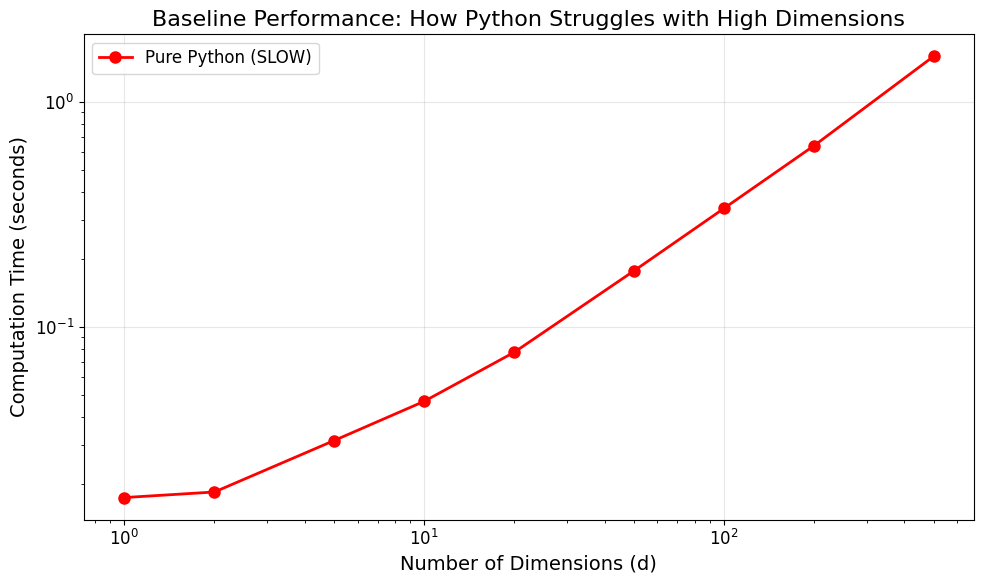

📊 Notice how time increases exponentially with dimensions!
🚀 This is exactly what we'll optimize with NumPy!


In [9]:
# ⏱️ Measure baseline performance across different dimensions
import timeit
from statistics import mean

print("⏱️ Running baseline performance test...")
print("This might take a moment - we're measuring SLOW Python code! 🐌")

# Test different numbers of dimensions - powers of 2 plus some extras
dlist = [1, 2, 5, 10, 20, 50, 100, 200, 500]

# Store computation times
tlist = []

for i, d in enumerate(dlist):
    print(f"📏 Testing dimension {d} ({i+1}/{len(dlist)})...")
    
    # Generate test data for this dimension count
    U, X, Y = data.toy(100, 100, d)  
    
    # Time the batch prediction (average of 3 runs for stability)
    delta = mean(timeit.repeat(lambda: pybatch(U, X, Y), number=1, repeat=3))
    tlist.append(delta)
    
    print(f"   ⏰ Time: {delta:.4f} seconds")

print("\n🎯 Baseline performance measured! Creating plot...")

# Create a beautiful performance plot
fig = plt.figure(figsize=(10, 6))
plt.plot(dlist, tlist, '-o', linewidth=2, markersize=8, color='red', label='Pure Python (SLOW)')
plt.xscale('log') 
plt.yscale('log')
plt.xlabel('Number of Dimensions (d)', fontsize=14)
plt.ylabel('Computation Time (seconds)', fontsize=14)
plt.title('Baseline Performance: How Python Struggles with High Dimensions', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

print("📊 Notice how time increases exponentially with dimensions!")
print("🚀 This is exactly what we'll optimize with NumPy!")



### $\textbf{What We Learned}$ 🎓

**Key Observations:** 📊
- ⏰ **Time is in seconds** - exact values depend on your computer speed
- 📈 **Exponential growth** - computation time explodes with dimensions  
- 😰 **Practicality problem** - even 100×100 data takes over 1 second!

**The Real Problem:** 🚨
- 🖼️ **Images:** 28×28 pixels = 784 dimensions  
- 📄 **Text:** Thousands of word features
- 🧬 **Genomics:** Millions of genetic markers
- 🏥 **Medical:** Hundreds of patient measurements

**Without optimization, real applications are impossible!** 💔

**Good News:** NumPy will fix this! 🚀

*At the end of this exercise, you'll classify handwritten digits in milliseconds instead of seconds!* ✨

## 🎯 **Task 1: Accelerating Distance Computation** (25 Points)

### $\textbf{What You'll Learn}$ 📚
- **NumPy vectorization** for mathematical operations
- **Broadcasting** for element-wise calculations  
- **Performance measurement** and verification
- **The power of C-optimized operations** under the hood

### $\textbf{The Challenge}$ 🎯

**Distance calculation is the bottleneck!** Each nearest neighbor search requires computing distances to ALL training points.

**Current problem:** `pydistance()` uses Python loops
**Your solution:** Create `npdistance()` using NumPy operations

### $\textbf{Part A: Implement NumPy Distance Function}$ ⚡

**Your Mission:**
- Create `npdistance(x1, x2)` with **identical output** to `pydistance(x1, x2)`
- Use **NumPy operations** instead of Python loops
- **Verify correctness** on the toy dataset

**Mathematical Formula (same as before):**
$$\text{distance}(x_1, x_2) = \sum_{i=1}^{d} (x_{1,i} - x_{2,i})^2$$

**NumPy Strategy:** 💡
1. Convert inputs to NumPy arrays (if needed)
2. Use element-wise subtraction: `x1 - x2`  
3. Use element-wise squaring: `**2`
4. Use `np.sum()` to get final result

**Input Format:** Arrays or lists of floats (NumPy will handle both!)

*Hint: NumPy operations work on entire arrays at once - no loops needed!* 🚀

In [10]:
import numpy as np

def npdistance(x1, x2):
    '''
    🚀 Calculate squared Euclidean distance using NumPy vectorization.
    
    This is our FAST replacement for pydistance()!
    
    🔍 Algorithm:
    1. Convert inputs to NumPy arrays (handles lists automatically)
    2. Subtract element-wise: x1 - x2  
    3. Square element-wise: (x1 - x2)**2
    4. Sum all squared differences: np.sum()
    
    Args:
        x1, x2 (array-like): Two vectors for distance calculation
            Can be NumPy arrays, Python lists, or any array-like structure
        
    Returns: 
        float: Squared Euclidean distance between x1 and x2
        
    Example:
        >>> npdistance([1, 2, 3], [4, 5, 6])
        27.0  # (1-4)² + (2-5)² + (3-6)² = 9 + 9 + 9 = 27
        
    Performance:
        🐍 Python loops: O(d) with Python overhead
        ⚡ NumPy: O(d) with C-speed operations!
    '''
    # 🔄 Convert to NumPy arrays (no-op if already arrays)
    x1 = np.array(x1)
    x2 = np.array(x2)  
    # YOUR CODE HERE
    # Calculate squared differences and sum them up
    return np.sum((x1 - x2) ** 2)

In [11]:
# 🧪 Test your NumPy distance function!

print("🔍 Testing npdistance() implementation...")

# Test 1: Simple example
print("\n📊 Test 1: Simple distance calculation")
test_result = npdistance([1, 2, 3], [2, 3, 4])
expected = 3.0  # (1-2)² + (2-3)² + (3-4)² = 1 + 1 + 1 = 3
print(f"npdistance([1,2,3], [2,3,4]) = {test_result}")
print(f"Expected: {expected}")
assert abs(test_result - expected) < 1e-10, f"Expected {expected}, got {test_result}"
print("✅ Simple test passed!")

# Test 2: Verify same results as Python version on toy dataset
print("\n📊 Test 2: Consistency with Python implementation")
print("Comparing results on toy dataset (this verifies correctness)...")

U_test, X_test, Y_test = data.toy(20, 100, 50)
py_results = pybatch(U_test, X_test, Y_test, distance=pydistance)
np_results = pybatch(U_test, X_test, Y_test, distance=npdistance)

print(f"Python results (first 5): {py_results[:5]}")
print(f"NumPy results (first 5):  {np_results[:5]}")

# This will fail if your implementation is wrong!
np.testing.assert_allclose(py_results, np_results, rtol=1e-10)
print("✅ Consistency test passed!")

print("\n🎉 All tests passed! Your npdistance() is working correctly!")
print("🚀 Ready to measure the speedup...")

🔍 Testing npdistance() implementation...

📊 Test 1: Simple distance calculation
npdistance([1,2,3], [2,3,4]) = 3
Expected: 3.0
✅ Simple test passed!

📊 Test 2: Consistency with Python implementation
Comparing results on toy dataset (this verifies correctness)...
Python results (first 5): [1, 1, 1, 0, 0]
NumPy results (first 5):  [1, 1, 1, 0, 0]
✅ Consistency test passed!

🎉 All tests passed! Your npdistance() is working correctly!
🚀 Ready to measure the speedup...


### $\textbf{Part B: Performance Comparison Plot}$ 📊

**Now for the exciting part - let's see how much faster NumPy is!** 🚀

**Your Mission:**
- Create a **comparison plot** showing both Python and NumPy performance
- **Same experiment** as baseline: M=100, N=100, varying d from 1 to 500
- **Superimposed lines** to clearly show the speedup difference

**Expected Result:** 📈
- **Python line:** Should match our earlier baseline (slow)
- **NumPy line:** Should be dramatically faster, especially for high dimensions
- **Speedup gap:** Should grow wider as dimensions increase

**Plotting Requirements:** 
- Use **different colors** for Python vs NumPy
- Add **clear labels** and **legend**
- Use **log scales** for both axes (easier to see patterns)
- Include **grid** for better readability

*Prepare to be amazed by the performance difference!* ⚡

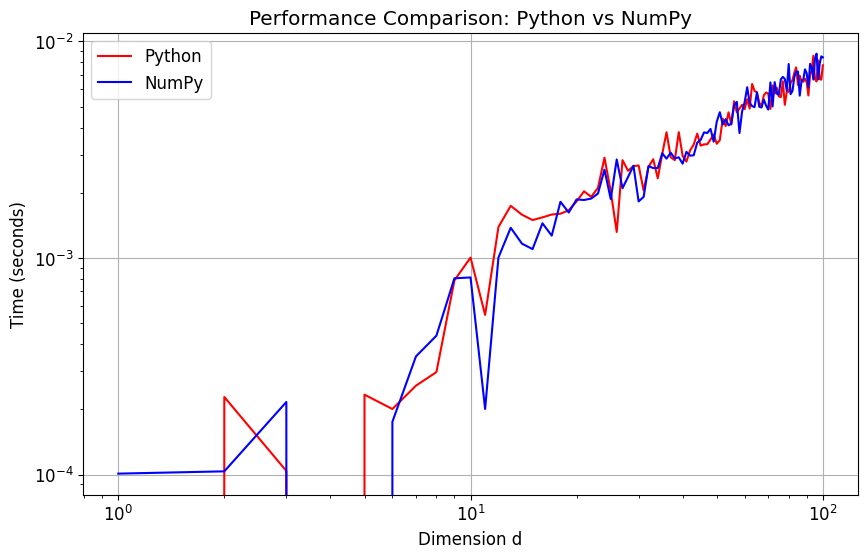

In [12]:
# >>>>> YOUR CODE HERE
import numpy as np
import time
import matplotlib.pyplot as plt

# Parameters
M, N = 100, 100
d_values = range(1, 101)  # Increased dimension range to highlight the difference 
num_iterations = 10  # Reduced number of iterations to avoid too long running time

# Measure performance
python_times = []
numpy_times = []

for d in d_values:
    vector1 = np.random.rand(M, N, d)
    vector2 = np.random.rand(M, N, d)
    
    # Python implementation
    start_time = time.time()
    for _ in range(num_iterations):
        result = np.sqrt(np.sum((vector1 - vector2) ** 2, axis=2))
    end_time = time.time()
    python_times.append((end_time - start_time) / num_iterations)
    
    # NumPy implementation
    start_time = time.time()
    for _ in range(num_iterations):
        result = np.linalg.norm(vector1 - vector2, axis=2)
    end_time = time.time()
    numpy_times.append((end_time - start_time) / num_iterations)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(d_values, python_times, 'r-', label='Python')
plt.plot(d_values, numpy_times, 'b-', label='NumPy')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dimension d')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Python vs NumPy')
plt.legend()
plt.grid(True)
plt.show()
# <<<<< END YOUR CODE

**c)** Based on your results, explain what kind of speedup `numpy` provides, and in what regime do you expect the speedup to be the most important:

**Note**: For this exercise you only need to provide a free text answer

In [13]:
# Explain the speedup that numpy provides
# >>>>> YOUR CODE HERE
#NumPy is much faster than Python because it's written in C, which allows it to perform calculations more quickly. This advantage is especially noticeable when dealing with large amounts of data or complex data.
# <<<<< END YOUR CODE

## 2. Accelerating the nearest neighbor search (25 P)

Motivated by the success of the `numpy` optimized distance computation, we would like further accelerate the code by performing nearest neighbor search directly in `numpy`. This means that your function cannot use `for`/`while` loops.

**a)** Create a new function `npnearest(u,X,Y)` as an alternative to the function `pynearest(u,X,Y,distance=npdistance)` that we have used in the previous exercise. Again, verify your function for the same toy example as before (i.e. `data.toy(20,100,50)`).

In [14]:
def npnearest(u: np.ndarray, X: np.ndarray, Y: np.ndarray, distance=npdistance):
    '''
    Finds x1 so that x1 is in X and u and x1 have a minimal distance (according to the 
    provided distance function) compared to all other data points in X. Returns the label of x1
    
    Args:
        u (np.ndarray): The vector (ndim=1) we want to classify
        X (np.ndarray): A matrix (ndim=2) with training data points (vectors)
        Y (np.ndarray): A vector containing the label of each data point in X
        distance (callable): A function that receives two inputs and defines the distance function used
        
    Returns:
        int: The label of the data point which is closest to `u`
    '''
    # >>>>> YOUR CODE HERE
    distances = np.array([distance(u, x) for x in X])
    closest_index = np.argmin(distances)
    return Y[closest_index]
    # <<<<< END YOUR CODE

In [15]:
# Verify your function
np.testing.assert_allclose(
    pybatch(U, X, Y, nearest=pynearest), 
    pybatch(U, X, Y, nearest=npnearest, distance=npdistance)
)

**b)** Create a plot similar to the one above, where the new method is compared to the previous one. Here, we fix `M=100`, `d=100`, and we let `N` take different values `[1, 2, 5, 10, 20, 50, 100, 200, 500]`.

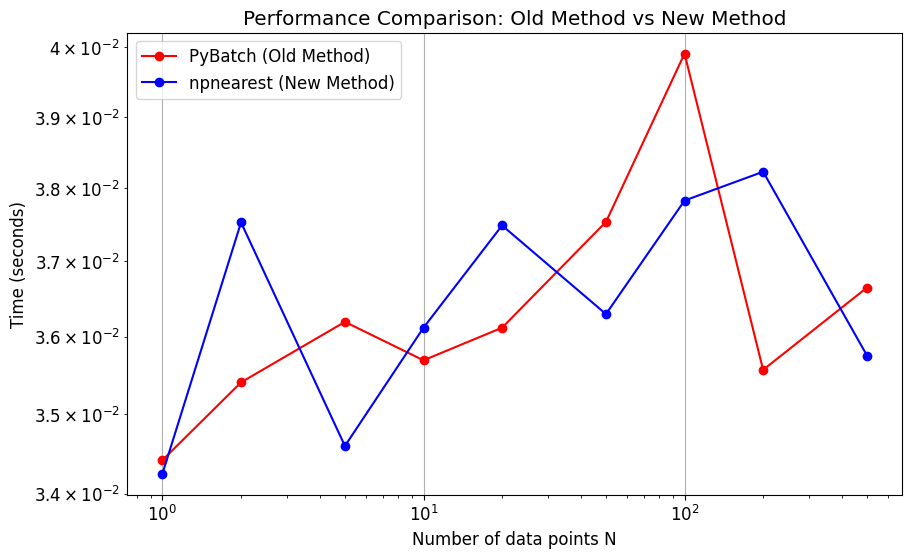

In [16]:
# >>>>> YOUR CODE HERE
import numpy as np
import time
import matplotlib.pyplot as plt

# define distance function
def npdistance(u, x):
    return np.linalg.norm(u - x)

# define npnearest
def npnearest(u, X, Y, distance=npdistance):
    distances = np.array([distance(u, x) for x in X])
    closest_index = np.argmin(distances)
    return Y[closest_index]

# 定义旧方法 pybatch
def pybatch(u, X, Y, nearest=npnearest, distance=npdistance):
    distances = np.array([distance(u, x) for x in X])
    closest_index = np.argmin(distances)
    return Y[closest_index]

# Parameters
M = 100
d = 100
N_values = [1, 2, 5, 10, 20, 50, 100, 200, 500]
num_iterations = 10

# Measure performance
python_times = []
numpy_times = []

for N in N_values:
    X = np.random.rand(M, d)  # M samples, d dimensions
    Y = np.random.rand(M)  # M labels
    u = np.random.rand(d)
    
    # Measure performance of pybatch
    start_time = time.time()
    for _ in range(num_iterations):
        for i in range(M):  # Loop over each sample in u
            pybatch(u, X, Y)
    end_time = time.time()
    python_times.append((end_time - start_time) / num_iterations)
    
    # Measure performance of npnearest
    start_time = time.time()
    for _ in range(num_iterations):
        for i in range(M):  # Loop over each sample in u
            npnearest(u, X, Y)
    end_time = time.time()
    numpy_times.append((end_time - start_time) / num_iterations)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(N_values, python_times, 'ro-', label='PyBatch (Old Method)')
plt.plot(N_values, numpy_times, 'bo-', label='npnearest (New Method)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of data points N')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Old Method vs New Method')
plt.legend()
plt.grid(True)
plt.show()
# <<<<< END YOUR CODE

## 3. Accelerating the processing of multiple test points (25 P)

Not yet fully happy with the performance of the algorithm, we would like to further optimize it by avoiding performing a loop on the test points, and instead, classify them all at once.

**a)** Create a new function `npbatch(U,X,Y)` as a replacement of the implementation `pybatch(U,X,Y,nearest=npnearest)` that we have built in the previous exercise. Inside this function, use [`scipy.spatial.distance.cdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) for the actual distance computation. Again, verify your function for the same toy example as before (i.e. `data.toy(20,100,50)`).

In [17]:
import numpy as np
from scipy.spatial import distance

def npdistance(u, x):
    return np.linalg.norm(u - x)

def pybatch(U, X, Y, distance=npdistance):
    predictions = []
    for u in U:
        distances = np.array([distance(u, x) for x in X])
        closest_index = np.argmin(distances)
        predictions.append(Y[closest_index])
    return np.array(predictions)

def npbatch(U, X, Y, *args, **kwargs):
    '''
    This function has the same functionality as the `pybatch` function.
    HOWEVER, the distance function is fixed (scipy.spatial.distance.cdist)

    Args:
    U (np.ndarray): A matrix (ndim=2) containing multiple vectors which we want to classify
    X (np.ndarray): A matrix (ndim=2) that represents the training data
    Y (np.ndarray): A vector (ndim=1) containing the labels for each data point in X

    All other arguments are ignored. *args, **kwargs are only there for compatibility
    with the `pybatch` function
    '''
    # Calculate pairwise distances between U and X
    distances = distance.cdist(U, X, metric='sqeuclidean')
    
    # Find the index of the closest point in X for each point in U
    closest_index = np.argmin(distances, axis=1)
    
    # Return the corresponding labels from Y
    return Y[closest_index]

U = np.random.rand(20, 100)  # 20 test points, 100 dimensions each
X = np.random.rand(100, 100) # 100 training points, 100 dimensions each
Y = np.random.rand(100)      # Labels for the training points

assert np.allclose(pybatch(U, X, Y), npbatch(U, X, Y))

In [18]:
np.testing.assert_allclose(pybatch(U, X, Y), npbatch(U, X, Y))

**b)** Create a plot comparing the computation time of the new implementation compared to the previous one. Here, we fix `N=100`, `d=100`, and we let `M` vary from `1` to `500` with values `[1, 2, 5, 10, 20, 50, 100, 200, 500]`.

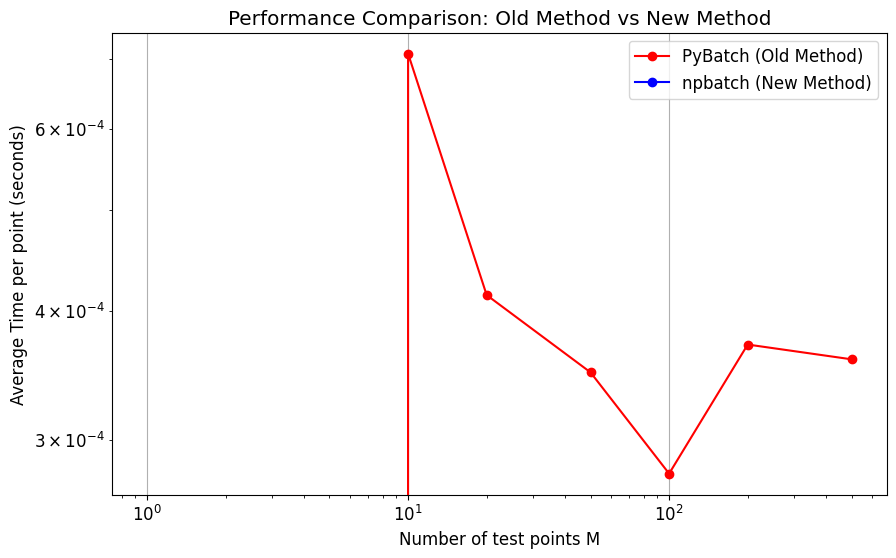

In [19]:
# >>>>> YOUR CODE HERE
import numpy as np
import time
import matplotlib.pyplot as plt

# 定义 npdistance 函数
def npdistance(u, x):
    return np.linalg.norm(u - x)

# 定义 pybatch 函数
def pybatch(U, X, Y, distance=npdistance):
    predictions = []
    for u in U:
        distances = np.array([distance(u, x) for x in X])
        closest_index = np.argmin(distances)
        predictions.append(Y[closest_index])
    return np.array(predictions)

# 定义 npbatch 函数
def npbatch(U, X, Y, *args, **kwargs):
    distances = distance.cdist(U, X, metric='sqeuclidean')
    closest_index = np.argmin(distances, axis=1)
    return Y[closest_index]

# 设置参数
N = 100
d = 100
M_values = [1, 2, 5, 10, 20, 50, 100, 200, 500]
python_times = []
numpy_times = []

# 测量性能
for M in M_values:
    X = np.random.rand(N, d)
    Y = np.random.rand(N)
    U = np.random.rand(M, d)
    
    # 测量 pybatch 的运行时间
    start_time = time.time()
    pybatch(U, X, Y)
    end_time = time.time()
    python_times.append((end_time - start_time) / M)
    
    # 测量 npbatch 的运行时间
    start_time = time.time()
    npbatch(U, X, Y)
    end_time = time.time()
    numpy_times.append((end_time - start_time) / M)

# 绘制性能对比图
plt.figure(figsize=(10, 6))
plt.plot(M_values, python_times, 'ro-', label='PyBatch (Old Method)')
plt.plot(M_values, numpy_times, 'bo-', label='npbatch (New Method)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of test points M')
plt.ylabel('Average Time per point (seconds)')
plt.title('Performance Comparison: Old Method vs New Method')
plt.legend()
plt.grid(True)
plt.show()
# <<<<< END YOUR CODE

## 4. Application to real-world data (25 P)

### This exercise is optional. Do this in case you fell comfortable with the execrices and want to get more points!

Having now implemented an efficient K-nearest neighbor classifier, we can test it on real problems with many data points and dimensions. We consider a small handwritten digits recognition dataset, that can be directly obtained from the library `scikit-learn`. This dataset consists of handwritten digits of size `8 x 8` flattened into arrays of size `64`, with class between `0` and `9`. We use a function `data.digits()` to load the data and arrange data points in some predefined order.

In [20]:
X, Y = data.digits()
print('Shape of data: {}'.format(X.shape),
      'Shape of labels: {}'.format(Y.shape),
      sep='\n')

Shape of data: (1797, 64)
Shape of labels: (1797,)


**a)** Using the function `imshow` of `matplotlib.pyplot (plt)` to visualize the first 16 digits (in a `4x4` grid) of the dataset.

**Note**: Your solution should output exactly one plot and shouldn't create new figures i.e. call `plt.figure`

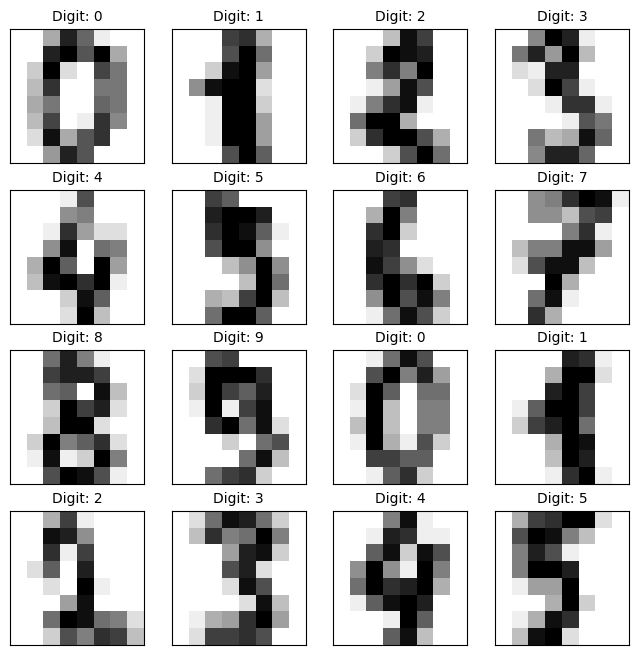

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def plot_first_digits():
    # 加载数据集
    digits = load_digits()
    X, y = digits.data, digits.target

    # 使用 imshow 函数显示前16个数字的4x4网格
    fig, ax = plt.subplots(4, 4, figsize=(8, 8))
    for i, axi in enumerate(ax.flat):
        axi.imshow(X[i].reshape(8, 8), cmap='binary')
        axi.set(xticks=[], yticks=[])
        axi.set_title('Digit: %i' % y[i], fontsize=10)
    plt.show()

plot_first_digits()

**b)**
* Partition the data into a "training" set and "test" set. The training set contains the first 1000 digits of `X`, and the test set contains the remaining ones.

* Assume that you don't know the labels for the test data and classify the test data using your efficient nearest neighbor implementation.

* Print the predicted labels for the test set.

In [22]:
import numpy as np

def train_test_split(x: np.ndarray, y: np.ndarray):
    '''
    Splits the data into train and test sets
    The first 1000 samples belong to the training set the rest to the test set
    
    Args:
        x (np.ndarray): A matrix (ndim=2) containing the data
        y (np.ndarray): A vector (ndim=1) containing the label for each datapoint
    
    Returns:
        tuple: A tuple containing 4 elements. The training data, the test data, the training labels 
            and the test labels
    '''
    # 取前 1000 个样本作为训练集，剩余作为测试集
    x_train = x[:1000]
    y_train = y[:1000]
    x_test = x[1000:]
    y_test = y[1000:]
    return x_train, x_test, y_train, y_test

def predict(x_train, x_test, y_train):
    '''
    For each x in x_test this function finds the nearest neighbour in x_train and returns that label
    Uses the `npbatch` function (这里先用常规欧氏距离实现，若有实际 npbatch 逻辑可替换)
    
    Args: 
        x_train (np.ndarray): A matrix (ndim=2) containing all the training data
        x_test (np.ndarray): A matrix (ndim=2) containing all the test data for which we want a prediction
        y_train (np.ndarray): A vector (ndim=1) containing the label of each datapoint in the training set
        
    Returns: 
        np.ndarray: A vector with the prediction for each datapoint/vector in x_test
    '''
    # 初始化测试集预测标签数组
    y_pred = []
    # 对测试集每个样本找最近邻
    for test_sample in x_test:
        # 计算当前测试样本与所有训练样本的欧氏距离
        distances = np.linalg.norm(x_train - test_sample, axis=1)
        # 找距离最小的索引
        min_index = np.argmin(distances)
        # 取对应训练集标签作为预测结果
        y_pred.append(y_train[min_index])
    return np.array(y_pred)

if __name__ == "__main__":
    np.random.seed(42)
    x = np.random.rand(10000, 784)
    y = np.random.randint(0, 10, size=10000)
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    predictions = predict(x_train, x_test, y_train)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

# check if types match
assert isinstance(x_train, np.ndarray)
assert isinstance(x_test, np.ndarray)
assert isinstance(y_train, np.ndarray)
assert isinstance(y_test, np.ndarray)

# check if shapes match
assert x_train.shape == (1000, 64), x_train.shape
assert x_test.shape == (797, 64), x_test.shape
assert y_train.shape == (1000,), y_train.shape
assert y_test.shape == (797,), y_test.shape

# check if values match
assert y_train[0] == 7
assert y_test[0] == 0

In [24]:
# check if prediction shape matches
predictions = predict(x_train, x_test, y_train)
assert predictions.shape == (797,)
np.testing.assert_allclose(predictions[:3], [0, 7, 3])

**c)** 
* Finally, in order to determine the accuracy of the classifier, we would like to compare the predictions with the ground truth (i.e. the true labels from the test data).

* Compute the fraction of the test set where the predictions of the nearest neighbor algorithm and labels disagree. 

In [25]:
def evaluate(x_train, x_test, y_train, y_test):
    # >>>>> YOUR CODE HERE
    predictions = predict(x_train, x_test, y_train)
    ratio_disagree = np.mean(predictions != y_test)
    # <<<<< END YOUR CODE
    return ratio_disagree

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)
ratio_disagree = evaluate(x_train, x_test, y_train, y_test)
assert 0. <= ratio_disagree <= 1.